<a href="https://colab.research.google.com/github/tanongsakintean/google_colab/blob/main/CNN_Dog_or_Cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise
# Keras CNN Dog or Cat Classification
https://datasets.activeloop.ai/docs/ml/datasets/kaggle-cats-dogs-dataset/



In [1]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random


In [2]:
from google.colab import drive #case mounted gdrive
drive.mount('/content/gdrive', force_remount=False)


Mounted at /content/gdrive


In [3]:
import os  #case connect via OS
os.chdir("/content/gdrive/")
os.getcwd()

'/content/gdrive'

In [39]:
path = "/content/gdrive/MyDrive/Colab Notebooks/input"
files = os.listdir(path)
print(os.listdir(path))

['Cat', 'Dog']


In [5]:
categories1= []
filename_dog = os.listdir(path+"/Dog")
for filename in filename_dog:
        categories1.append(0)
df1 = pd.DataFrame({
    'filename': filename_dog,
    'category': categories1
})
categories2= []
filename_cat = os.listdir(path+"/Cat")
for filename in filename_cat:
        categories2.append(1)

df2 = pd.DataFrame({
    'filename': filename_cat,
    'category': categories2
})


In [14]:
from PIL import Image
def resize():
  for item in filename_dog:
    if os.path.isfile(path+'/Dog/'+item):
      im = Image.open(path+'/Dog/'+item)
      f, e = os.path.splitext(path+'/Dog/'+item)
      imResize = im.resize((200,200), Image.ANTIALIAS)
      if imResize != 'RGB':
          imResize = imResize.convert('RGB')
      imResize.save('/content/gdrive/MyDrive/Colab Notebooks/input/Dog/Dognew/'+ item ,'JPEG',qulity=90)
      print(imResize.size)
resize()

#resize image อ่านภาพแล้วมา resize 200*200 ทำให้เป็น RGB

<ipython-input-14-cf210700f0c7>:7: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  imResize = im.resize((200,200), Image.ANTIALIAS)


(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)

In [15]:
def resize1():
  for item in filename_cat:
    if os.path.isfile(path+'/Cat/'+item):
      im = Image.open(path+'/Cat/'+item)
      f, e = os.path.splitext(path+'/Cat/'+item)
      imResize = im.resize((200,200), Image.ANTIALIAS)
      if imResize != 'RGB':
          imResize = imResize.convert('RGB')
      imResize.save('/content/gdrive/MyDrive/Colab Notebooks/input/Cat/Catnew/'+ item ,'JPEG',qulity=90)
      print(imResize.size)
resize1()

<ipython-input-15-a9c0a62c8545>:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  imResize = im.resize((200,200), Image.ANTIALIAS)


(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)

In [16]:
df1.head(10)

,filename,category
0,100.jpg,0
1,1.jpg,0
2,10.jpg,0
3,0.jpg,0
4,101.jpg,0
5,102.jpg,0
6,103.jpg,0
7,104.jpg,0
8,105.jpg,0
9,106.jpg,0


In [17]:
df2.head(10)

,filename,category
0,100.jpg,1
1,0.jpg,1
2,10.jpg,1
3,1.jpg,1
4,101.jpg,1
5,102.jpg,1
6,103.jpg,1
7,104.jpg,1
8,105.jpg,1
9,106.jpg,1


In [18]:
df = df1.append(df2)

<ipython-input-18-68017848d1f5>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df1.append(df2)


In [19]:
df.describe()

,category
count,602.000000
mean,0.500000
std,0.500416
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [20]:
df.tail(10)

,filename,category
291,90.jpg,1
292,91.jpg,1
293,92.jpg,1
294,93.jpg,1
295,94.jpg,1
296,95.jpg,1
297,96.jpg,1
298,97.jpg,1
299,98.jpg,1
300,99.jpg,1


In [21]:
df.head(10)

,filename,category
0,100.jpg,0
1,1.jpg,0
2,10.jpg,0
3,0.jpg,0
4,101.jpg,0
5,102.jpg,0
6,103.jpg,0
7,104.jpg,0
8,105.jpg,0
9,106.jpg,0


<Axes: >

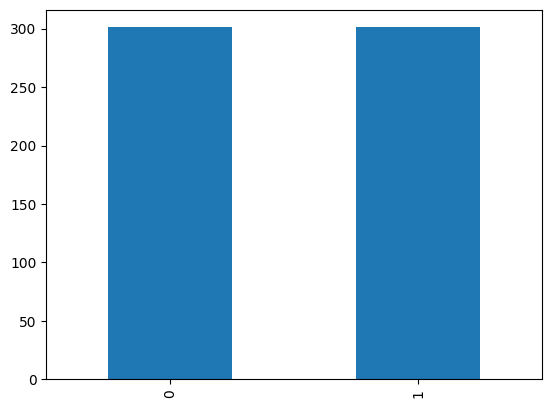

In [22]:
df['category'].value_counts().plot.bar()

In [30]:
path_cat = '/content/gdrive/MyDrive/Colab Notebooks/input/Cat/Catnew/'
path_dog = '/content/gdrive/MyDrive/Colab Notebooks/input/Dog/Dognew/'

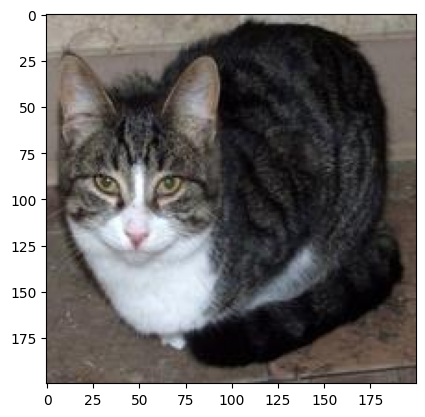

In [29]:
sample = random.choice(filename_cat)
image = load_img(path_cat+sample)
plt.imshow(image)

จงนำข้อมูลภาพที่กำหนดให้ ไปเรียนรู้ด้วยอัลกอริทึม CNN โดยมีการออกแบบดังนี้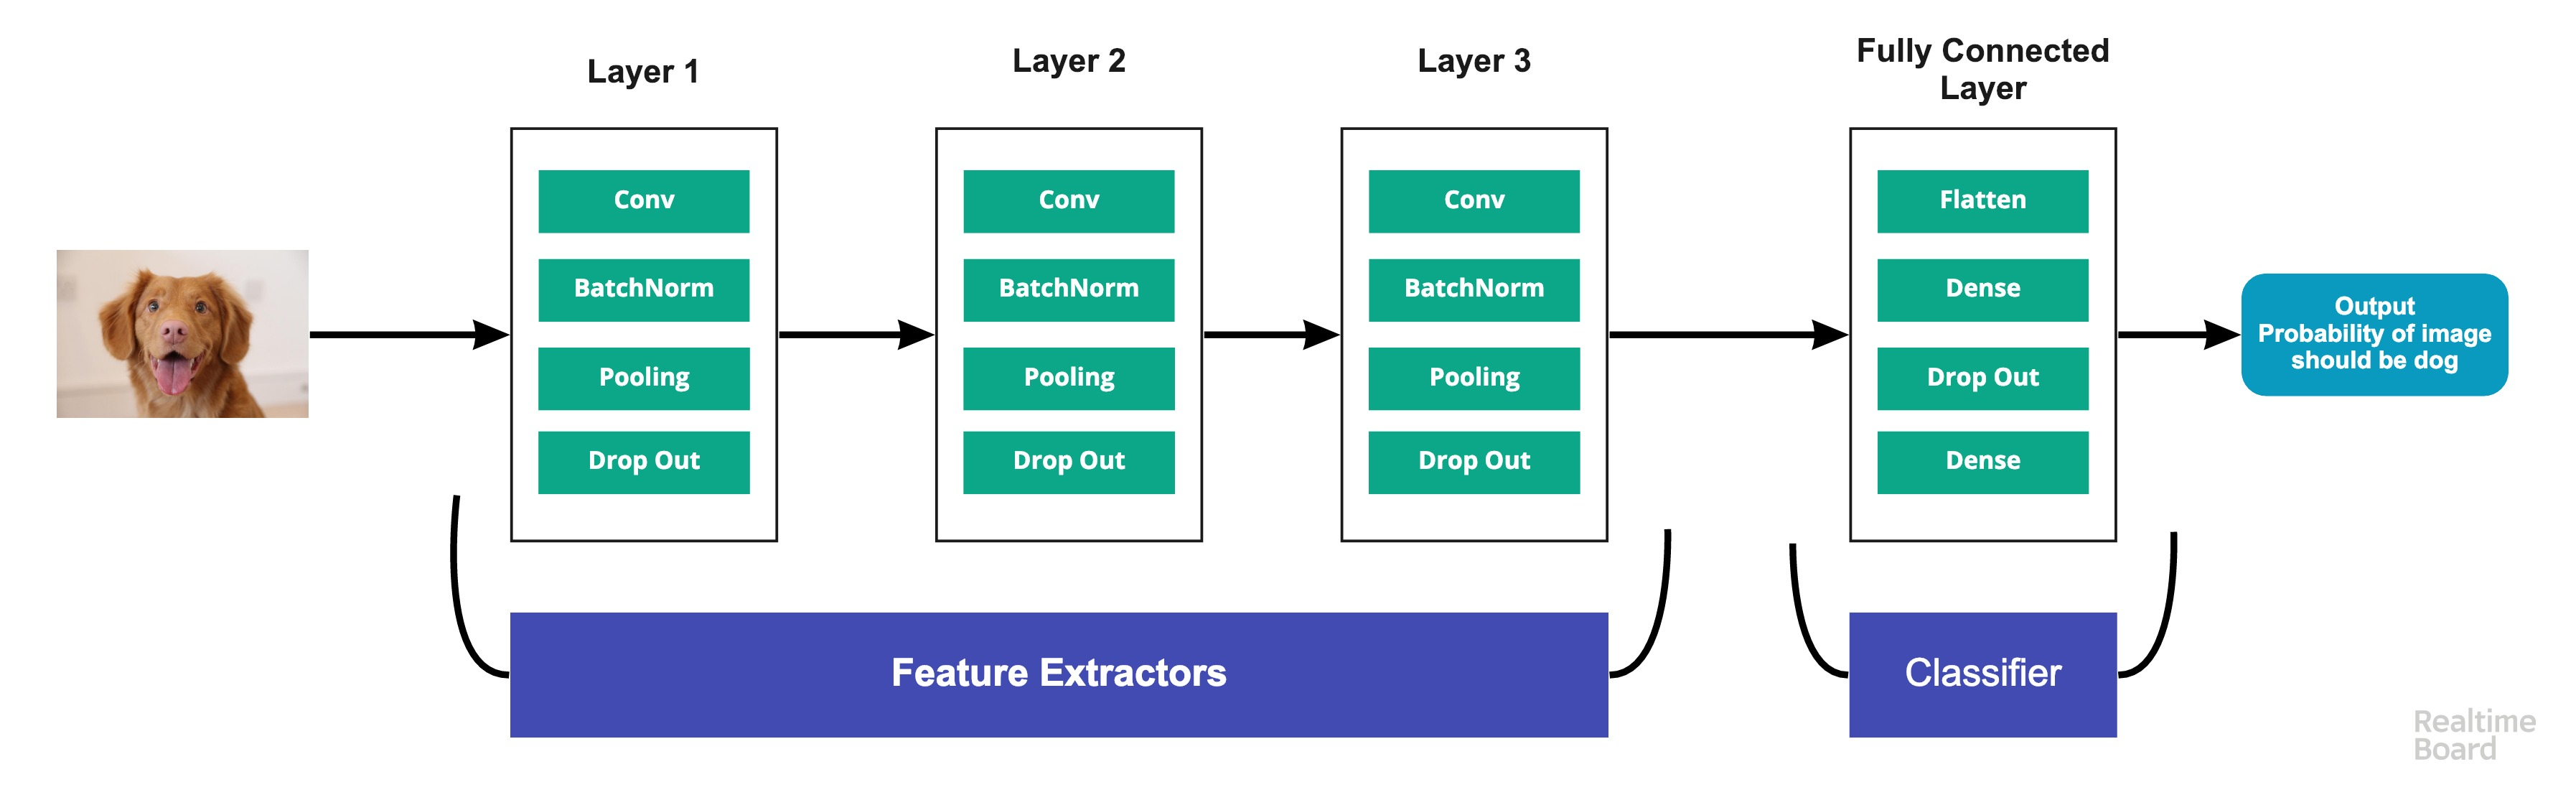

Input Layer: It represent input image data. It will reshape image into single diminsion array. Example your image is 64x64 = 4096, it will convert to (4096,1) array.

Conv Layer: This layer will extract features from image.
Pooling Layer: This layerreduce the spatial volume of input image after convolution.

Fully Connected Layer: It connect the network from a layer to another layer

Output Layer: It is the predicted values layer.

https://www.kaggle.com/code/kasikrit/keras-cnn-dog-or-cat-classification

โดยให้ออกแบบ Deep Learning ได้ตามความต้องการ เพื่อให้ได้ค่าประสิทธิภาพที่สูงที่สุดเท่าที่จะทำได้ เมื่อเขียน code ได้ค่าประสิทธิภาพตามที่ต้องการแล้ว ให้นักศึกษาวาด deep Learning architecture ออกมาเป็นภาพเพื่อให้เห็นกระบวนการการออกแบบตั้งแต่ต้นจนจบ


In [31]:
pip install keras

In [32]:
pip install tensorflow

In [33]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array

In [42]:
X =  np.empty([0])
y = np.empty([0])
filename_dog = os.listdir(path_dog)
filename_cat = os.listdir(path_cat)
for filename in filename_dog:
    print(path_dog+filename)
    # load the image
    img = load_img(path_dog+filename)

    #print(type(img))
    #print(img.format)
    #print(img.mode)
    print(img.size)
    img.show()

  # convert image to array
     # convert to numpy array
    img_array = img_to_array(img)

    X = np.append (X,img_array)
    category = filename.split('.')[0]
    y = np.append(y,[0])

for filename in filename_cat:
    print(path_cat+filename)
    # load the image
    img = load_img(path_cat+filename)

    #print(type(img))
    #print(img.format)
    #print(img.mode)
    print(img.size)
    img.show()


     # convert to numpy array
    img_array = img_to_array(img)

    X = np.append (X,img_array)
    category = filename.split('.')[0]
    y = np.append(y,[1])


/content/gdrive/MyDrive/Colab Notebooks/input/Dog/Dognew/100.jpg
(200, 200)
/content/gdrive/MyDrive/Colab Notebooks/input/Dog/Dognew/1.jpg
(200, 200)
/content/gdrive/MyDrive/Colab Notebooks/input/Dog/Dognew/10.jpg
(200, 200)
/content/gdrive/MyDrive/Colab Notebooks/input/Dog/Dognew/0.jpg
(200, 200)
/content/gdrive/MyDrive/Colab Notebooks/input/Dog/Dognew/101.jpg
(200, 200)
/content/gdrive/MyDrive/Colab Notebooks/input/Dog/Dognew/102.jpg
(200, 200)
/content/gdrive/MyDrive/Colab Notebooks/input/Dog/Dognew/103.jpg
(200, 200)
/content/gdrive/MyDrive/Colab Notebooks/input/Dog/Dognew/104.jpg
(200, 200)
/content/gdrive/MyDrive/Colab Notebooks/input/Dog/Dognew/105.jpg
(200, 200)
/content/gdrive/MyDrive/Colab Notebooks/input/Dog/Dognew/106.jpg
(200, 200)
/content/gdrive/MyDrive/Colab Notebooks/input/Dog/Dognew/107.jpg
(200, 200)
/content/gdrive/MyDrive/Colab Notebooks/input/Dog/Dognew/108.jpg
(200, 200)
/content/gdrive/MyDrive/Colab Notebooks/input/Dog/Dognew/109.jpg
(200, 200)
/content/gdrive/M

In [43]:
X = X.reshape(len(y),200,200,3)
x_vector = 200*200*3

In [44]:
print(X.shape)
print(y.shape)
print(type(X))
print(type(y))

(602, 200, 200, 3)
(602,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [46]:
print(y)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [47]:
X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=1000)
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

print(type(X_train))
print(type(y_train))

len_train  = len(X_train)
len_test = len(X_test)

X_train shape (481, 200, 200, 3)
y_train shape (481,)
X_test shape (121, 200, 200, 3)
y_test shape (121,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [48]:
X_train /= 255
X_test /= 255

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (481, 200, 200, 3)
y_train shape (481,)
X_test shape (121, 200, 200, 3)
y_test shape (121,)


In [49]:
X_train[1]

array([[[0.16862745, 0.12941176, 0.09411765],
        [0.16862745, 0.12941176, 0.09411765],
        [0.16862745, 0.12941176, 0.09411765],
        ...,
        [0.3254902 , 0.32941176, 0.2745098 ],
        [0.33333333, 0.3372549 , 0.28235294],
        [0.33333333, 0.3372549 , 0.28235294]],

       [[0.16862745, 0.12941176, 0.09411765],
        [0.16862745, 0.12941176, 0.09411765],
        [0.16862745, 0.12941176, 0.09411765],
        ...,
        [0.3254902 , 0.32941176, 0.2745098 ],
        [0.32941176, 0.33333333, 0.27843137],
        [0.3254902 , 0.32941176, 0.2745098 ]],

       [[0.16862745, 0.12941176, 0.09411765],
        [0.17254902, 0.13333333, 0.09803922],
        [0.17254902, 0.13333333, 0.09803922],
        ...,
        [0.32941176, 0.33333333, 0.27843137],
        [0.32156863, 0.3254902 , 0.27058824],
        [0.31764706, 0.32156863, 0.26666667]],

       ...,

       [[0.31764706, 0.39607843, 0.39215686],
        [0.34117647, 0.41960784, 0.41568627],
        [0.35686275, 0

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D

# Three Block  Model

In [51]:

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(200,200, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Add dropout for regularization
    Dense(1, activation='sigmoid')
])


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 67712)             0

In [52]:
history = model.fit(X_train, y_train, batch_size=32, epochs=10,validation_data = (X_test,y_test),callbacks =None)

Epoch 1/10
16/16 [==============================] - 52s 3s/step - loss: 1.2019 - accuracy: 0.5343 - val_loss: 0.6913 - val_accuracy: 0.5455
Epoch 2/10
16/16 [==============================] - 52s 3s/step - loss: 0.6913 - accuracy: 0.5239 - val_loss: 0.6837 - val_accuracy: 0.5455
Epoch 3/10
16/16 [==============================] - 52s 3s/step - loss: 0.6848 - accuracy: 0.5281 - val_loss: 0.6883 - val_accuracy: 0.4959
Epoch 4/10
16/16 [==============================] - 66s 4s/step - loss: 0.6933 - accuracy: 0.5509 - val_loss: 0.6939 - val_accuracy: 0.4959
Epoch 5/10
16/16 [==============================] - 52s 3s/step - loss: 0.6777 - accuracy: 0.5821 - val_loss: 0.6699 - val_accuracy: 0.5785
Epoch 6/10
16/16 [==============================] - 57s 4s/step - loss: 0.6403 - accuracy: 0.6445 - val_loss: 0.6670 - val_accuracy: 0.6116
Epoch 7/10
16/16 [==============================] - 52s 3s/step - loss: 0.6438 - accuracy: 0.6694 - val_loss: 0.6693 - val_accuracy: 0.5289
Epoch 8/10
16/16 [==

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


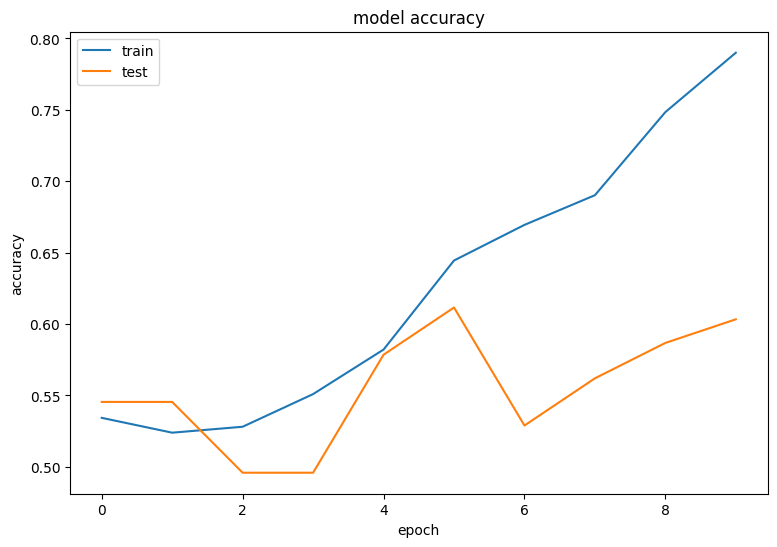

In [53]:
print(history.history.keys())
plt.figure(figsize=(9,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

In [54]:
test_loss, test_accuracy = model.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_accuracy)

4/4 - 3s - loss: 0.8001 - accuracy: 0.6033

Test accuracy: 0.6033057570457458


In [55]:
class_names = ['Dog', 'Cat']

In [56]:
from sklearn.metrics import classification_report # tested with 0.21.2l
# Get Model Predictions for test data
prediction = model.predict(X_test)
# Predict the class based on the probability
predicted_class = (prediction> 0.5).astype("int32")
print(classification_report(y_test, predicted_class, target_names=class_names))

              precision    recall  f1-score   support

         Dog       0.57      0.80      0.67        60
         Cat       0.68      0.41      0.51        61

    accuracy                           0.60       121
   macro avg       0.62      0.60      0.59       121
weighted avg       0.62      0.60      0.59       121



In [58]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predicted_class)

array([[48, 12],
       [36, 25]])

# Three Block CNN Model with SGD optimizer





In [ ]:
from keras.optimizers import SGD
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))
 # compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 200, 200, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 100, 100, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 100, 100, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 50, 50, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 50, 50, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 25, 25, 128)     

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30,validation_data = (X_test,y_test),callbacks =None)


Epoch 1/30
15/15 [==============================] - 63s 4s/step - loss: 0.6294 - accuracy: 0.6169 - val_loss: 0.6503 - val_accuracy: 0.5929
Epoch 2/30
15/15 [==============================] - 53s 4s/step - loss: 0.6282 - accuracy: 0.6236 - val_loss: 0.6400 - val_accuracy: 0.6283
Epoch 3/30
15/15 [==============================] - 60s 4s/step - loss: 0.5841 - accuracy: 0.7171 - val_loss: 0.6204 - val_accuracy: 0.6814
Epoch 4/30
15/15 [==============================] - 53s 4s/step - loss: 0.5557 - accuracy: 0.7550 - val_loss: 0.6394 - val_accuracy: 0.6372
Epoch 5/30
15/15 [==============================] - 53s 4s/step - loss: 0.5679 - accuracy: 0.6860 - val_loss: 0.7818 - val_accuracy: 0.5044
Epoch 6/30
15/15 [==============================] - 58s 4s/step - loss: 0.5846 - accuracy: 0.6592 - val_loss: 0.6049 - val_accuracy: 0.7168
Epoch 7/30
15/15 [==============================] - 52s 4s/step - loss: 0.6382 - accuracy: 0.6281 - val_loss: 0.6668 - val_accuracy: 0.5752
Epoch 8/30
15/15 [==

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_accuracy)

4/4 - 4s - loss: 0.7188 - accuracy: 0.6637 - 4s/epoch - 1s/step

Test accuracy: 0.6637167930603027


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


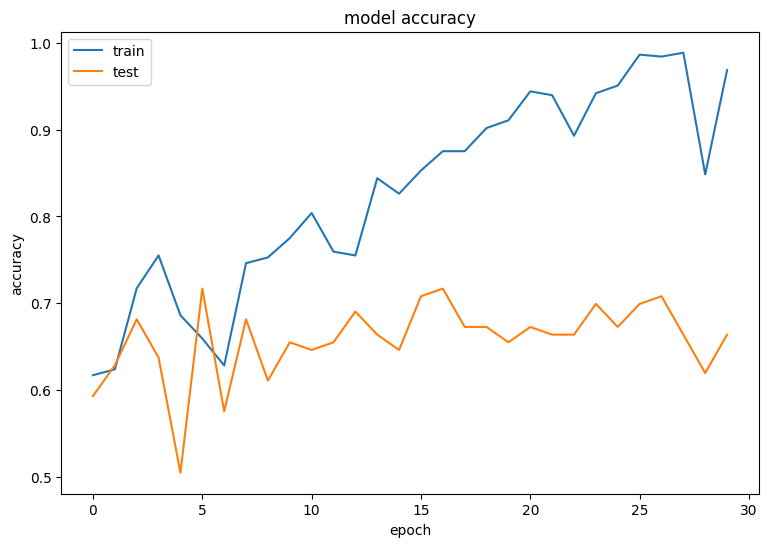

In [ ]:
print(history.history.keys())
plt.figure(figsize=(9,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

# Three Block CNN Model with SGD optimizer and DropOut

In [ ]:
modelD = Sequential()
modelD.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
modelD.add(MaxPooling2D((2, 2)))
modelD.add(Dropout(0.2))
modelD.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
modelD.add(MaxPooling2D((2, 2)))
modelD.add(Dropout(0.2))
modelD.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
modelD.add(MaxPooling2D((2, 2)))
modelD.add(Dropout(0.2))
modelD.add(Flatten())
modelD.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
modelD.add(Dropout(0.5))
modelD.add(Dense(1, activation='sigmoid'))
# compile model
opt = SGD(lr=0.001, momentum=0.9)
modelD.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
historyD = modelD.fit(X_train, y_train, batch_size=32, epochs=50,validation_data = (X_test,y_test),callbacks =None)

Epoch 1/50
15/15 [==============================] - 71s 5s/step - loss: 0.7335 - accuracy: 0.5612 - val_loss: 0.6929 - val_accuracy: 0.5664
Epoch 2/50
15/15 [==============================] - 56s 4s/step - loss: 0.6901 - accuracy: 0.5367 - val_loss: 0.6917 - val_accuracy: 0.5487
Epoch 3/50
15/15 [==============================] - 58s 4s/step - loss: 0.6886 - accuracy: 0.5367 - val_loss: 0.6871 - val_accuracy: 0.5487
Epoch 4/50
15/15 [==============================] - 58s 4s/step - loss: 0.7035 - accuracy: 0.4766 - val_loss: 0.6910 - val_accuracy: 0.5929
Epoch 5/50
15/15 [==============================] - 56s 4s/step - loss: 0.6880 - accuracy: 0.5100 - val_loss: 0.6908 - val_accuracy: 0.5575
Epoch 6/50
15/15 [==============================] - 53s 4s/step - loss: 0.7020 - accuracy: 0.4922 - val_loss: 0.6883 - val_accuracy: 0.5487
Epoch 7/50
15/15 [==============================] - 58s 4s/step - loss: 0.6948 - accuracy: 0.5323 - val_loss: 0.6911 - val_accuracy: 0.5929
Epoch 8/50
15/15 [==

# Visualize model

In [59]:
pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 7.7 MB/s eta 0:00:00


In [60]:
import visualkeras

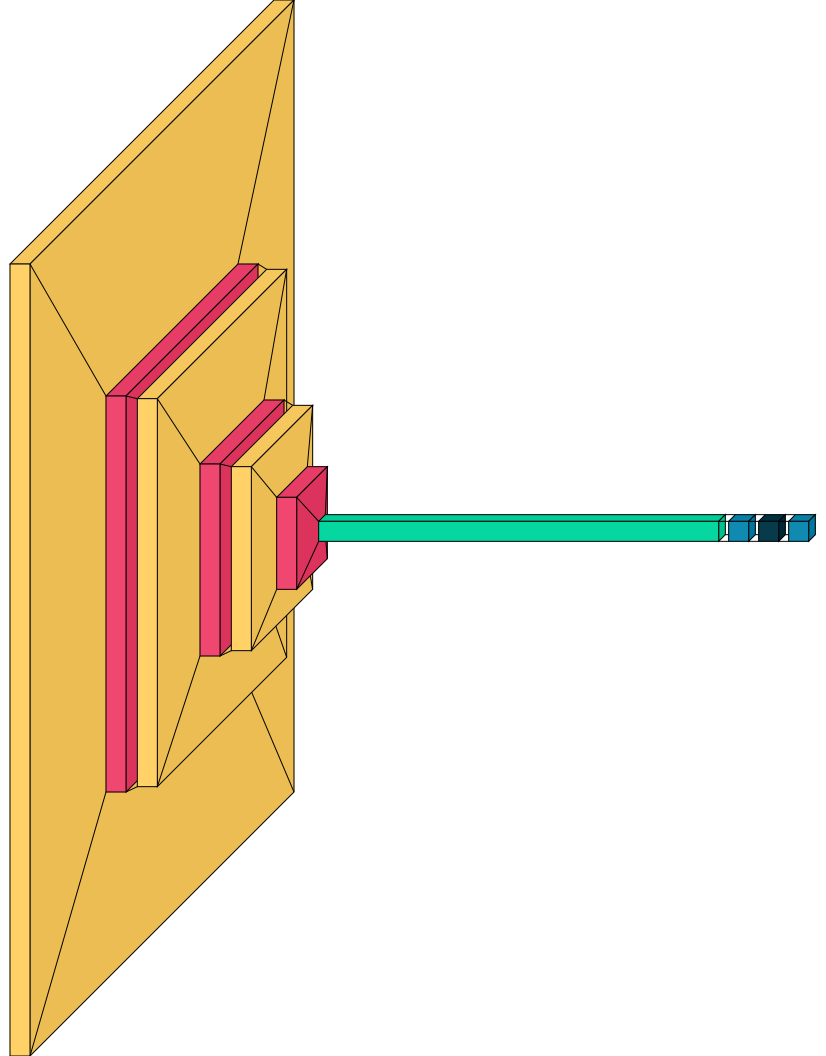

In [61]:
visualkeras.layered_view(model)

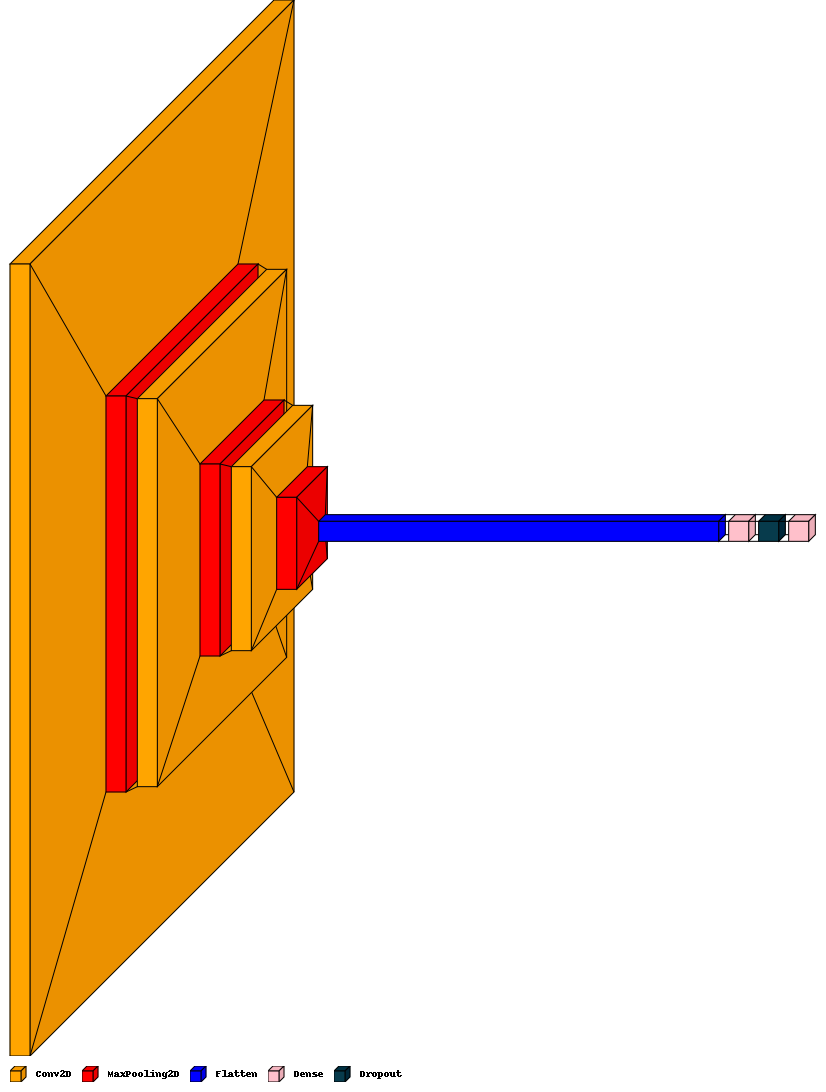

In [62]:
from collections import defaultdict
color_map = defaultdict(dict)
color_map[Conv2D]['fill'] = 'orange'
color_map[MaxPooling2D]['fill'] = 'red'
color_map[Dense]['fill'] = 'pink'
color_map[Flatten]['fill'] = 'blue'
visualkeras.layered_view(model, legend=True,spacing=10, color_map=color_map)

In [63]:
tf.keras.Sequential([model,tf.keras.layers.Softmax()])
result = model.predict(X_test)
for i in range(10):
  print(np.argmax(result[i]))

0
0
0
0
0
0
0
0
0
0


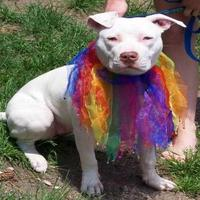

In [78]:
from tensorflow.keras.utils import array_to_img
image_show = array_to_img(X_test[3].reshape(200,200,3))
image_show

In [79]:
print(np.argmax(result[3])) #dog = 0 , cat = 1
resultx = np.argmax(result[3])
if resultx == 0:
  print("Dog")
else:
  print("Cat")


0
Dog


In [80]:
# load and prepare the image
def load_image(filename):
 # load the image
 img = load_img(filename, target_size=(200, 200))
 # convert to array
 img = img_to_array(img)
 # reshape into a single sample with 3 channels
 img = img.reshape(1, 200, 200, 3)
 # center pixel data
 img = img.astype('float32')
 img /= 255
 #img = img - [123.68, 116.779, 103.939]
 return img

# load an image and predict the class
def run_example():
 # load the image
 img = load_image('/content/momcat.jpg')
 # predict the class
 result = model.predict(img)
 print(result)
 result_class = (result> 0.5).astype("int32")

 if result_class  == 0:
    print("Dog")
 else:
    print("Cat")

# entry point, run the example
run_example()

[[0.09217749]]
Dog
